In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('C:/Users/Dream Store/Downloads/Homework/total_tokens_vs_invoke_chain_time.csv')

In [2]:
# Using SQL to check the data
import duckdb 
cursor = duckdb.connect()
cursor.execute(f"""         
create table tokens as select * from 'C:/Users/Dream Store/Downloads/Homework/total_tokens_vs_invoke_chain_time.csv';
""")

In [3]:
# Verify that table have been loaded.
cursor.execute("""
select * from tokens;
""").df()

,Date,Service,log.dd.version,@log.total_tokens,@log.invoke_chain_time_in_seconds,Message
0,2024-04-15 08:02:17.914,"""cape-core""","""1.755.0""",3900,1.788951,Producing a GREY evaluation for 88d457ad-ad40-...
1,2024-04-15 08:02:16.137,"""cape-core""","""1.755.0""",5145,1.643420,Producing a BNGN evaluation for b92b6af6-9e14-...
2,2024-04-15 08:00:13.227,"""cape-core""","""1.755.0""",1209,1.005915,Producing a PHSH evaluation for 9177d6a5-5c8f-...
3,2024-04-15 07:57:32.104,"""cape-core""","""1.755.0""",1457,1.065354,Producing a GREY evaluation for 05f7dcca-3e88-...
4,2024-04-15 07:53:44.841,"""cape-core""","""1.755.0""",434,0.895787,Producing a SPAM evaluation for 50bc0f4f-443e-...
...,...,...,...,...,...,...
2715,2024-04-11 07:14:21.462,"""cape-core""","""1.754.0""",1303,1.025840,Producing a BNGN evaluation for 69eee65e-4e3d-...
2716,2024-04-11 07:12:28.307,"""cape-core""","""1.754.0""",1314,0.906478,Producing a BNGN evaluation for 97277502-cc79-...
2717,2024-04-11 07:10:44.170,"""cape-core""","""1.754.0""",612,1.987708,Producing a SPAM evaluation for bb4cacdb-6289-...
2718,2024-04-11 07:10:26.050,"""cape-core""","""1.754.0""",1302,3.891216,Producing a BNGN evaluation for 1e364e08-7b84-...


In [4]:
# Check for Duplicates - No Duplicates
cursor.execute("""
select distinct * from tokens;
""").df()

,Date,Service,log.dd.version,@log.total_tokens,@log.invoke_chain_time_in_seconds,Message
0,2024-04-15 07:57:32.104,"""cape-core""","""1.755.0""",1457,1.065354,Producing a GREY evaluation for 05f7dcca-3e88-...
1,2024-04-15 07:44:20.804,"""cape-core""","""1.755.0""",817,2.562366,Producing a BNGN evaluation for 3ae9391b-dc58-...
2,2024-04-15 06:52:21.335,"""cape-core""","""1.755.0""",896,1.302955,Producing a BNGN evaluation for 9ca648b5-6948-...
3,2024-04-15 06:37:27.693,"""cape-core""","""1.755.0""",618,1.729052,Producing a BEC evaluation for 02c223f0-86dc-4...
4,2024-04-15 06:31:58.818,"""cape-core""","""1.755.0""",10365,1.786800,Producing a BNGN evaluation for ac4c3dbb-ea71-...
...,...,...,...,...,...,...
2715,2024-04-11 08:02:58.364,"""cape-core""","""1.755.0""",529,0.968086,Producing a BNGN evaluation for 6b88b5cb-6d08-...
2716,2024-04-11 07:46:26.594,"""cape-core""","""1.755.0""",4865,1.534345,Producing a PHSH evaluation for 8681ff1b-4a6c-...
2717,2024-04-11 07:41:30.328,"""cape-core""","""1.755.0""",1303,1.048459,Producing a BNGN evaluation for 353a0344-7302-...
2718,2024-04-11 07:22:38.061,"""cape-core""","""1.755.0""",1304,0.903453,Producing a BNGN evaluation for d2e988de-9f2d-...


In [5]:
# Check for Anomalies/Outliers - No Anomalies/Outliers
cursor.execute("""          
select 
  percentile_cont(0.99) within group (order by "@log.total_tokens") as Token_99th,
  percentile_cont(0.99) within group (order by "@log.invoke_chain_time_in_seconds") as ResponseTime_99th
from tokens;
""").df()

,Token_99th,ResponseTime_99th
0,9919.81,4.089054


In [6]:
# Check Gaps - No Gaps
cursor.execute("""             
select *
from tokens
where "@log.total_tokens" is not null and "@log.invoke_chain_time_in_seconds" is not null;              
""").df()

,Date,Service,log.dd.version,@log.total_tokens,@log.invoke_chain_time_in_seconds,Message
0,2024-04-15 08:02:17.914,"""cape-core""","""1.755.0""",3900,1.788951,Producing a GREY evaluation for 88d457ad-ad40-...
1,2024-04-15 08:02:16.137,"""cape-core""","""1.755.0""",5145,1.643420,Producing a BNGN evaluation for b92b6af6-9e14-...
2,2024-04-15 08:00:13.227,"""cape-core""","""1.755.0""",1209,1.005915,Producing a PHSH evaluation for 9177d6a5-5c8f-...
3,2024-04-15 07:57:32.104,"""cape-core""","""1.755.0""",1457,1.065354,Producing a GREY evaluation for 05f7dcca-3e88-...
4,2024-04-15 07:53:44.841,"""cape-core""","""1.755.0""",434,0.895787,Producing a SPAM evaluation for 50bc0f4f-443e-...
...,...,...,...,...,...,...
2715,2024-04-11 07:14:21.462,"""cape-core""","""1.754.0""",1303,1.025840,Producing a BNGN evaluation for 69eee65e-4e3d-...
2716,2024-04-11 07:12:28.307,"""cape-core""","""1.754.0""",1314,0.906478,Producing a BNGN evaluation for 97277502-cc79-...
2717,2024-04-11 07:10:44.170,"""cape-core""","""1.754.0""",612,1.987708,Producing a SPAM evaluation for bb4cacdb-6289-...
2718,2024-04-11 07:10:26.050,"""cape-core""","""1.754.0""",1302,3.891216,Producing a BNGN evaluation for 1e364e08-7b84-...


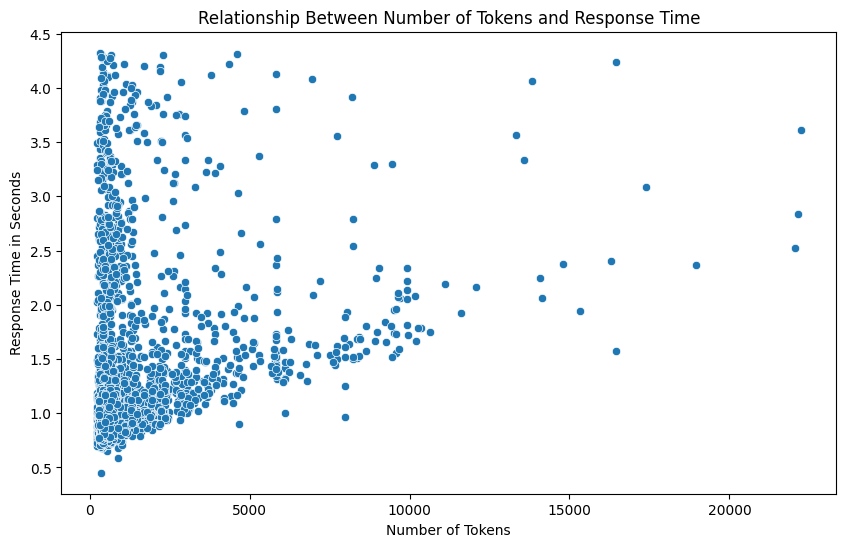

In [7]:
# Visualizing the relationship with a scatter plot to understand the general trend
plt.figure(figsize=(10, 6))
sns.scatterplot(x='@log.total_tokens', y='@log.invoke_chain_time_in_seconds', data=data)
plt.title('Relationship Between Number of Tokens and Response Time')
plt.xlabel('Number of Tokens')
plt.ylabel('Response Time in Seconds')
plt.show()

In [8]:
# Calculating the correlation coefficient to quantify the relationship
correlation = data['@log.total_tokens'].corr(data['@log.invoke_chain_time_in_seconds'])
print(f'Correlation coefficient between number of tokens and response time: {correlation:.3f}')

Correlation coefficient between number of tokens and response time: 0.245


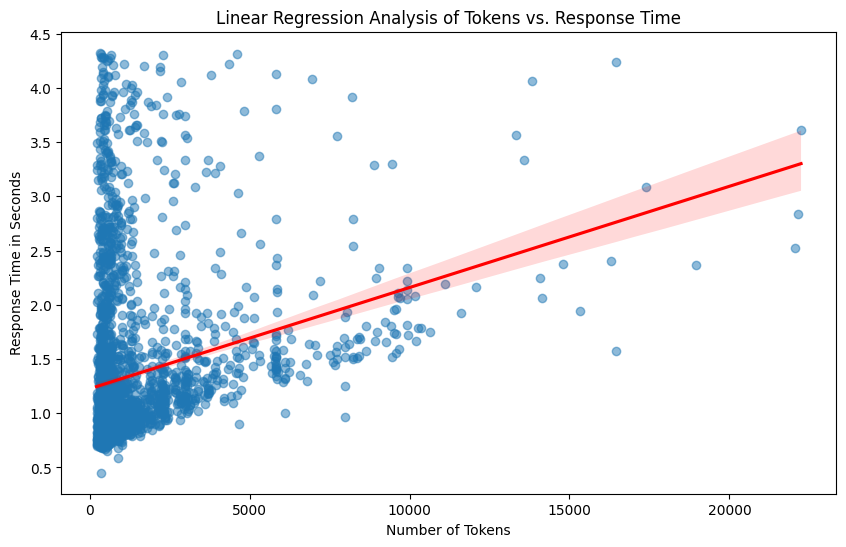

In [9]:
# Regression analysis to understand the nature of the relationship
plt.figure(figsize=(10, 6))
sns.regplot(x='@log.total_tokens', y='@log.invoke_chain_time_in_seconds', data=data, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Linear Regression Analysis of Tokens vs. Response Time')
plt.xlabel('Number of Tokens')
plt.ylabel('Response Time in Seconds')
plt.show()

C:\Users\Dream Store\AppData\Local\Temp\ipykernel_3136\1140065863.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby('token_bins')['@log.invoke_chain_time_in_seconds'].mean().reset_index()


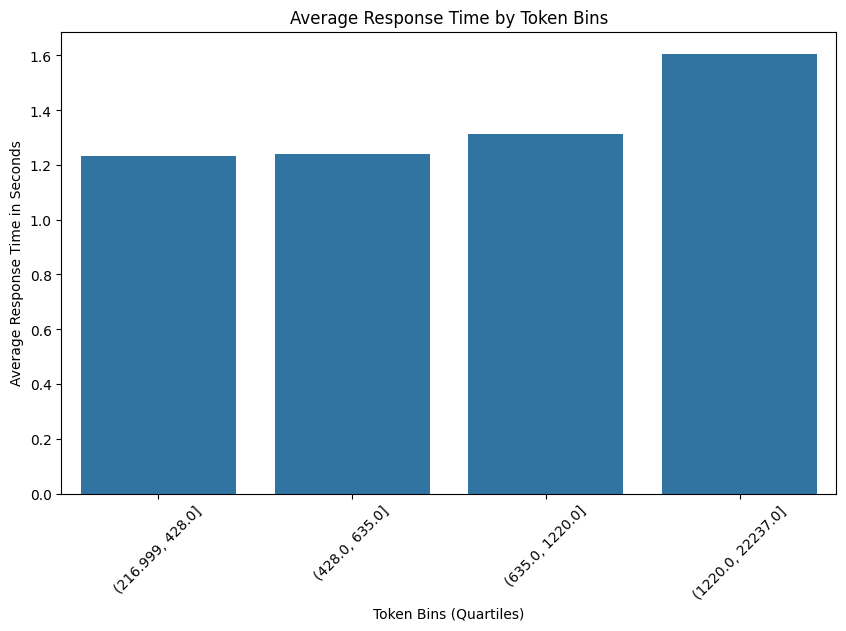

In [10]:
# Exploring if there is a token threshold affecting response times significantly
# We use quantile binning to divide the dataset into quartiles
data['token_bins'] = pd.qcut(data['@log.total_tokens'], q=4)
grouped_data = data.groupby('token_bins')['@log.invoke_chain_time_in_seconds'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='token_bins', y='@log.invoke_chain_time_in_seconds', data=grouped_data)
plt.title('Average Response Time by Token Bins')
plt.xlabel('Token Bins (Quartiles)')
plt.ylabel('Average Response Time in Seconds')
plt.xticks(rotation=45)
plt.show()